In [1]:
#To load data
import numpy as np
#Data visualization
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
import matplotlib.animation as animation
import cartopy.crs as ccrs
from scipy import stats
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cmocean
import xarray as xr
import cmath

In [2]:
file_path = '/Users/elifaigle/Desktop/Shane/gdp_v2.00.nc'
ds = xr.open_dataset(file_path)

In [3]:
file_path1 = '/Users/elifaigle/Desktop/Shane/gdp_addon_v2.00.nc'
ds_diurnal = xr.open_dataset(file_path1)

In [7]:
ds

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 ...
    longitude              (obs) float32 ...
    latitude               (obs) float32 ...
    time                   (obs) datetime64[ns] ...
    ids                    (obs) int64 ...
Dimensions without coordinates: traj, obs
Data variables: (12/53)
    rowsize                (traj) int64 ...
    location_type          (traj) bool ...
    WMO                    (traj) int32 ...
    expno                  (traj) int32 ...
    deploy_date            (traj) datetime64[ns] ...
    deploy_lon             (traj) float32 ...
    ...                     ...
    err_sst                (obs) float32 ...
    err_sst1               (obs) float32 ...
    err_sst2               (obs) float32 ...
    flg_sst                (obs) int8 ...
    flg_sst1               (obs) int8 ...
    flg_sst2               (obs) int8 ...
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-01-14T11:16:01.998226
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [8]:
lon = np.linspace(-180, 180, 180)
lat = np.linspace(-90, 90, 90)

In [9]:
time_bin = ds.time.astype('float')/(1e9*3600*24*365) - 17.75 + 1988 # in years


In [10]:
janA1count = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 <= 0.0849).where(ds.flg_sst2>=4),
                                    statistic='count', 
                                    bins=[lon, lat])

In [11]:
janA1std = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 <= 0.0849).where(ds.flg_sst2>=4),
                                    statistic=np.nanstd, 
                                    bins=[lon, lat])

/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [12]:
febA1count = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.0849).where(time_bin % 1 <= 0.1616).where(ds.flg_sst2>=4),
                                    statistic='count', 
                                    bins=[lon, lat])

In [13]:
febA1std = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.1616).where(time_bin % 1 <= 0.2465).where(ds.flg_sst2>=4),
                                    statistic=np.nanstd, 
                                    bins=[lon, lat])

/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [14]:
marA1count = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.1616).where(time_bin % 1 <= 0.2465).where(ds.flg_sst2>=4),
                                    statistic='count', 
                                    bins=[lon, lat])

In [15]:
marA1std = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.1616).where(time_bin % 1 <= 0.2465).where(ds.flg_sst2>=4),
                                    statistic=np.nanstd, 
                                    bins=[lon, lat])

/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [16]:
aprA1count = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.2465).where(time_bin % 1 <= 0.3287).where(ds.flg_sst2>=4),
                                    statistic='count', 
                                    bins=[lon, lat])

In [17]:
aprA1std = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.2465).where(time_bin % 1 <= 0.3287).where(ds.flg_sst2>=4),
                                    statistic=np.nanstd, 
                                    bins=[lon, lat])

/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [18]:
mayA1count = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.3287).where(time_bin % 1 <= 0.4136).where(ds.flg_sst2>=4),
                                    statistic='count', 
                                    bins=[lon, lat])

In [19]:
mayA1std = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.3287).where(time_bin % 1 <= 0.4136).where(ds.flg_sst2>=4),
                                    statistic=np.nanstd, 
                                    bins=[lon, lat])

/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [20]:
junA1count = stats.binned_statistic_2d(ds.longitude,
                                    ds.latitude,
                                   ds_diurnal.A1.where(time_bin % 1 >= 0.4136).where(time_bin % 1 <= 0.4958).where(ds.flg_sst2>=4),
                                    statistic='count', 
                                    bins=[lon, lat])

In [21]:
junA1std = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                   ds_diurnal.A1.where(time_bin % 1 >= 0.4136).where(time_bin % 1 <= 0.4958).where(ds.flg_sst2>=4),
                                    statistic=np.nanstd, 
                                    bins=[lon, lat])

/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [22]:
julA1count = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                   ds_diurnal.A1.where(time_bin % 1 >= 0.4958).where(time_bin % 1 <= 0.5807).where(ds.flg_sst2>=4),
                                    statistic='count', 
                                    bins=[lon, lat])

In [23]:
julA1std = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                   ds_diurnal.A1.where(time_bin % 1 >= 0.4958).where(time_bin % 1 <= 0.5807).where(ds.flg_sst2>=4),
                                    statistic=np.nanstd, 
                                    bins=[lon, lat])

/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [24]:
augA1count = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.5807).where(time_bin % 1 <= 0.6656).where(ds.flg_sst2>=4),
                                    statistic='count', 
                                    bins=[lon, lat])

In [25]:
augA1std = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.5807).where(time_bin % 1 <= 0.6656).where(ds.flg_sst2>=4),
                                    statistic=np.nanstd, 
                                    bins=[lon, lat])

/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [26]:
sepA1count = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.6656).where(time_bin % 1 <= 0.7478).where(ds.flg_sst2>=4),
                                    statistic='count', 
                                    bins=[lon, lat])

In [27]:
sepA1std = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.6656).where(time_bin % 1 <= 0.7478).where(ds.flg_sst2>=4),
                                    statistic=np.nanstd, 
                                    bins=[lon, lat])

/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [28]:
octA1count = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.7478).where(time_bin % 1 <= 0.8327).where(ds.flg_sst2>=4),
                                    statistic='count', 
                                    bins=[lon, lat])

In [29]:
octA1std = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                      ds_diurnal.A1.where(time_bin % 1 >= 0.7478).where(time_bin % 1 <= 0.8327).where(ds.flg_sst2>=4),
                                    statistic=np.nanstd, 
                                    bins=[lon, lat])

/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [30]:
novA1count = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.8327).where(time_bin % 1 <= 0.9149).where(ds.flg_sst2>=4),
                                    statistic='count', 
                                    bins=[lon, lat])

In [32]:
novA1std = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.8327).where(time_bin % 1 <= 0.9149).where(ds.flg_sst2>=4),
                                    statistic=np.nanstd, 
                                    bins=[lon, lat])

/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [33]:
decA1count = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.9149).where(time_bin % 1 <= 1).where(ds.flg_sst2>=4),
                                    statistic='count', 
                                    bins=[lon, lat])

In [34]:
decA1std = stats.binned_statistic_2d(ds.longitude, 
                                    ds.latitude,
                                    ds_diurnal.A1.where(time_bin % 1 >= 0.9149).where(time_bin % 1 <= 1).where(ds.flg_sst2>=4),
                                    statistic=np.nanstd, 
                                    bins=[lon, lat])

/Users/elifaigle/anaconda3/envs/shanevenv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [36]:
janA1count

BinnedStatistic2dResult(statistic=array([[  0.,   0.,   0., ..., 400.,  13.,  12.],
       [  0.,   0.,   0., ..., 446.,  13.,  16.],
       [  0.,   0.,   0., ..., 894.,  20.,  14.],
       ...,
       [  0.,   0.,   0., ..., 663., 183.,  61.],
       [  0.,   0.,   0., ..., 456.,  18.,  38.],
       [  0.,   0.,   0., ...,  93.,  41.,  31.]]), x_edge=array([-180.       , -177.98883  , -175.97766  , -173.96648  ,
       -171.9553   , -169.94414  , -167.93297  , -165.92178  ,
       -163.91061  , -161.89944  , -159.88828  , -157.87709  ,
       -155.86592  , -153.85475  , -151.84358  , -149.8324   ,
       -147.82123  , -145.81006  , -143.79889  , -141.7877   ,
       -139.77654  , -137.76537  , -135.7542   , -133.74301  ,
       -131.73184  , -129.72067  , -127.709496 , -125.698326 ,
       -123.68715  , -121.67598  , -119.6648   , -117.65363  ,
       -115.642456 , -113.63129  , -111.62011  , -109.60894  ,
       -107.59776  , -105.58659  , -103.57542  , -101.56425  ,
        -99.553

Calculating SEM and Plotting:

In [37]:
janSEM = janA1std.statistic.T / np.sqrt(janA1count.statistic.T)
febSEM = febA1std.statistic.T / np.sqrt(febA1count.statistic.T)
marSEM = marA1std.statistic.T / np.sqrt(marA1count.statistic.T)
aprSEM = aprA1std.statistic.T / np.sqrt(aprA1count.statistic.T)
maySEM = mayA1std.statistic.T / np.sqrt(mayA1count.statistic.T)
junSEM = junA1std.statistic.T / np.sqrt(junA1count.statistic.T)
julSEM = julA1std.statistic.T / np.sqrt(julA1count.statistic.T)
augSEM = augA1std.statistic.T / np.sqrt(augA1count.statistic.T)
sepSEM = sepA1std.statistic.T / np.sqrt(sepA1count.statistic.T)
octSEM = octA1std.statistic.T / np.sqrt(octA1count.statistic.T)
novSEM = novA1std.statistic.T / np.sqrt(novA1count.statistic.T)
decSEM = decA1std.statistic.T / np.sqrt(decA1count.statistic.T)





/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_6036/1618814694.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("cmo.thermal", 31)


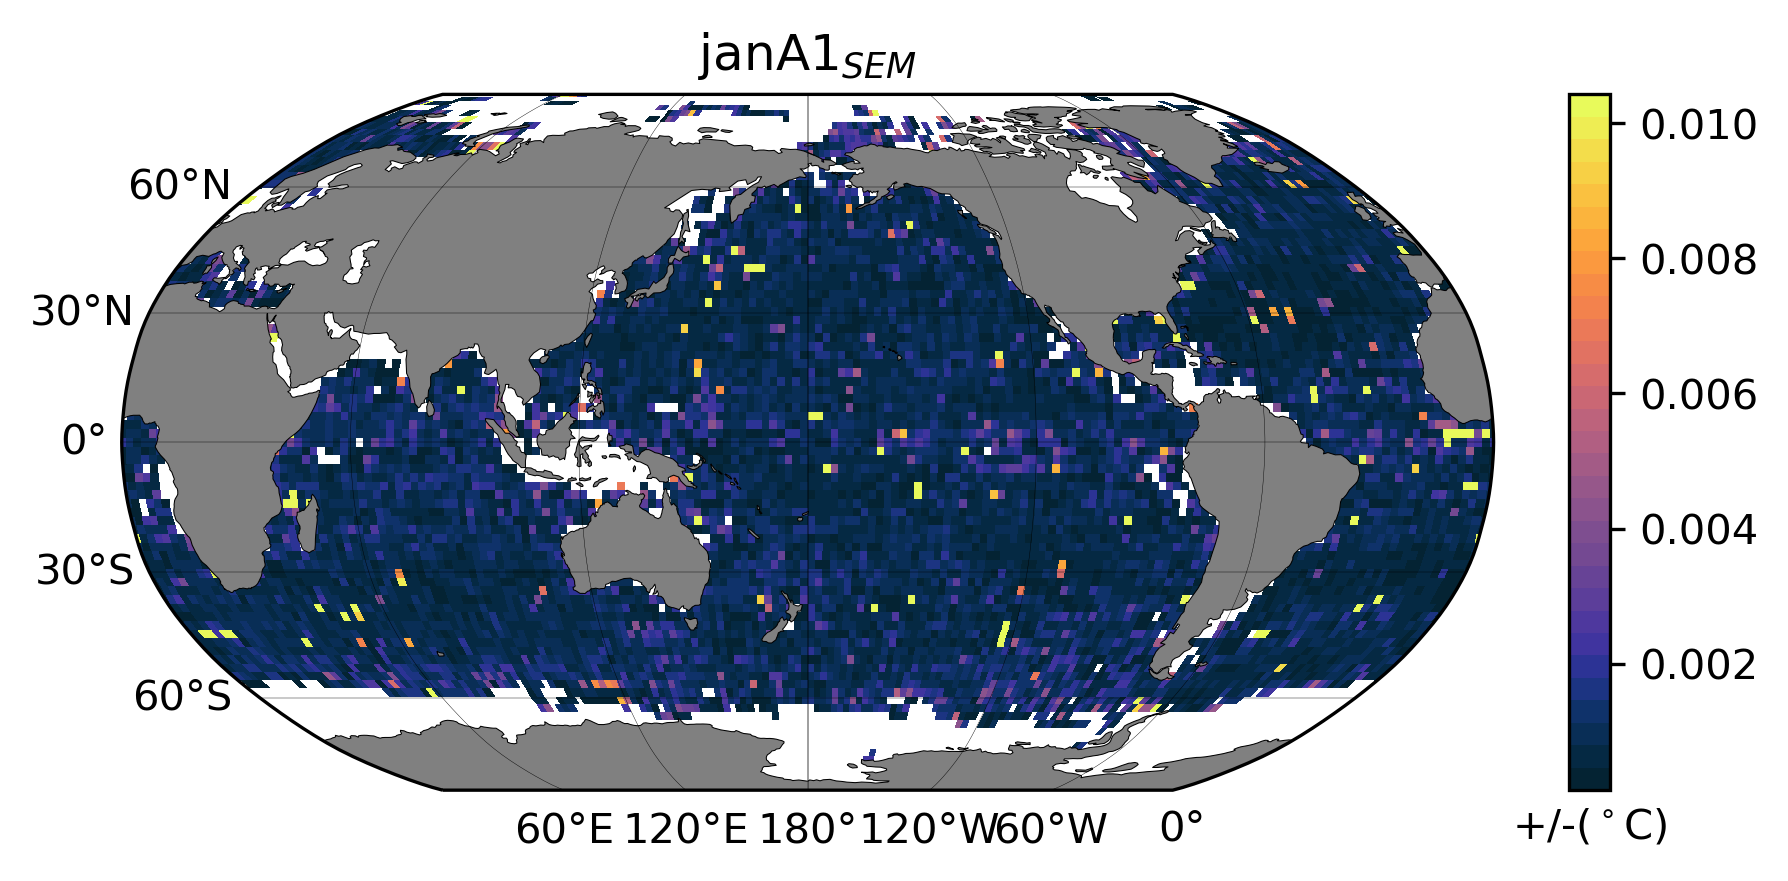

In [38]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(janSEM,[1,99])
cmap = plt.cm.get_cmap("cmo.thermal", 31)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    janSEM,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('janA1$_{SEM}$',);
cb.ax.set_xlabel("+/-($^\circ$C)")
plt.savefig("/Users/elifaigle/Desktop/Shane/janSEMA1.png")

/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_6036/2557427012.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("cmo.thermal", 31)


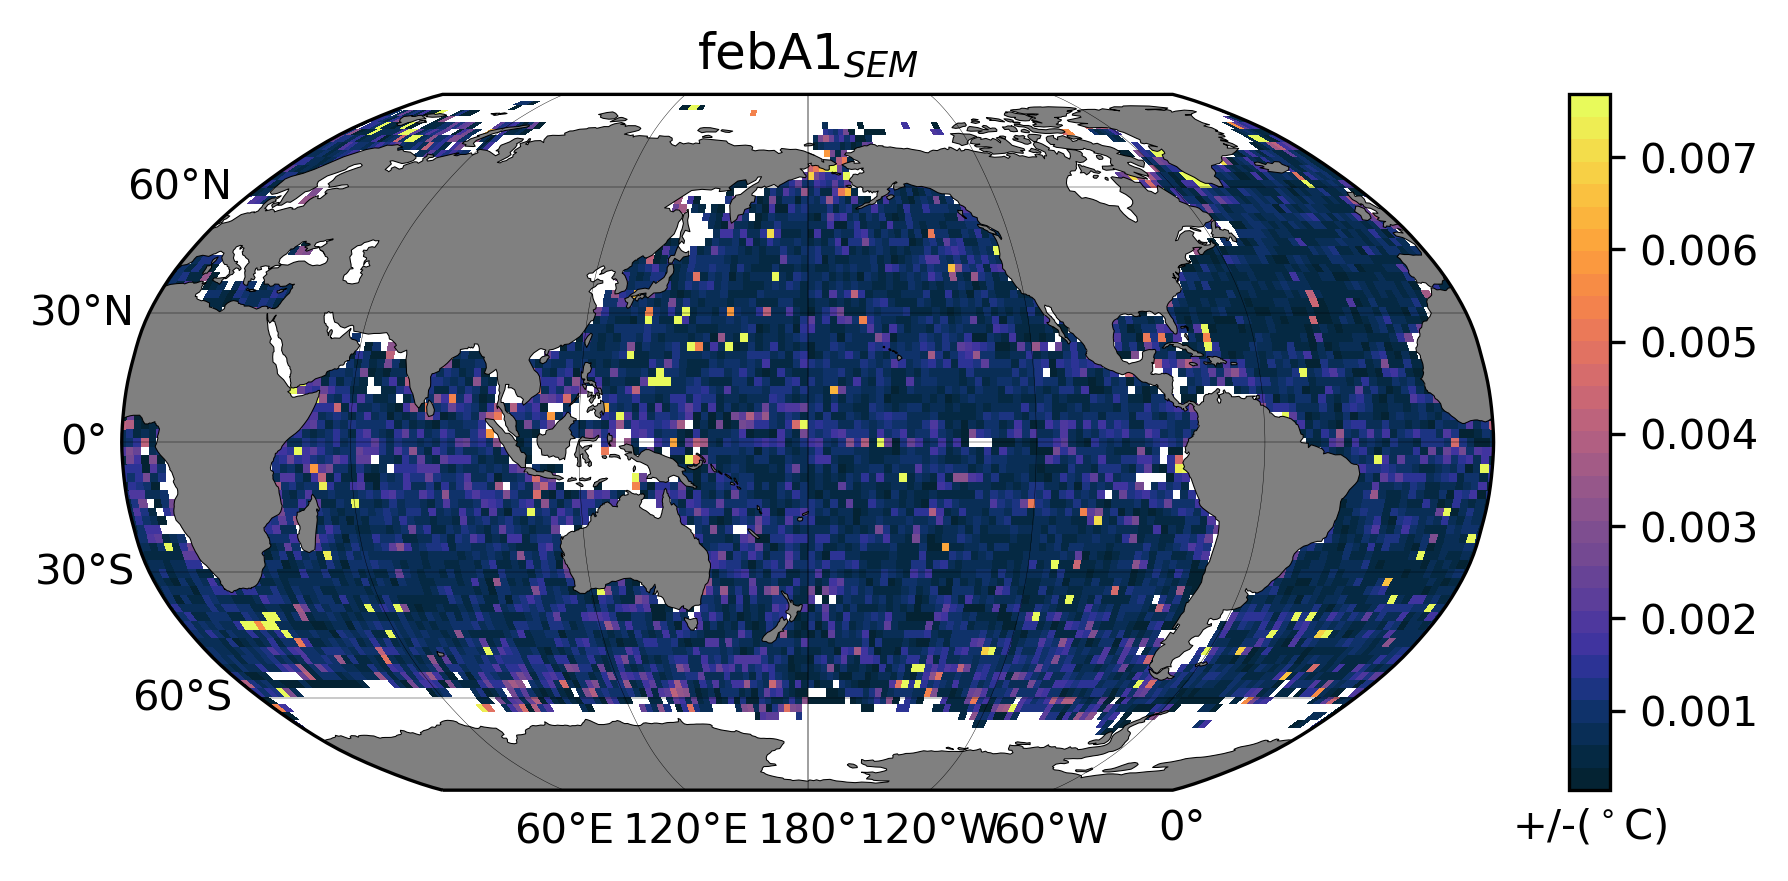

In [39]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(febSEM,[1,99])
cmap = plt.cm.get_cmap("cmo.thermal", 31)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    febSEM,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('febA1$_{SEM}$',);
cb.ax.set_xlabel("+/-($^\circ$C)")
plt.savefig("/Users/elifaigle/Desktop/Shane/febSEMA1.png")

/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_6036/2573937915.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("cmo.thermal", 31)


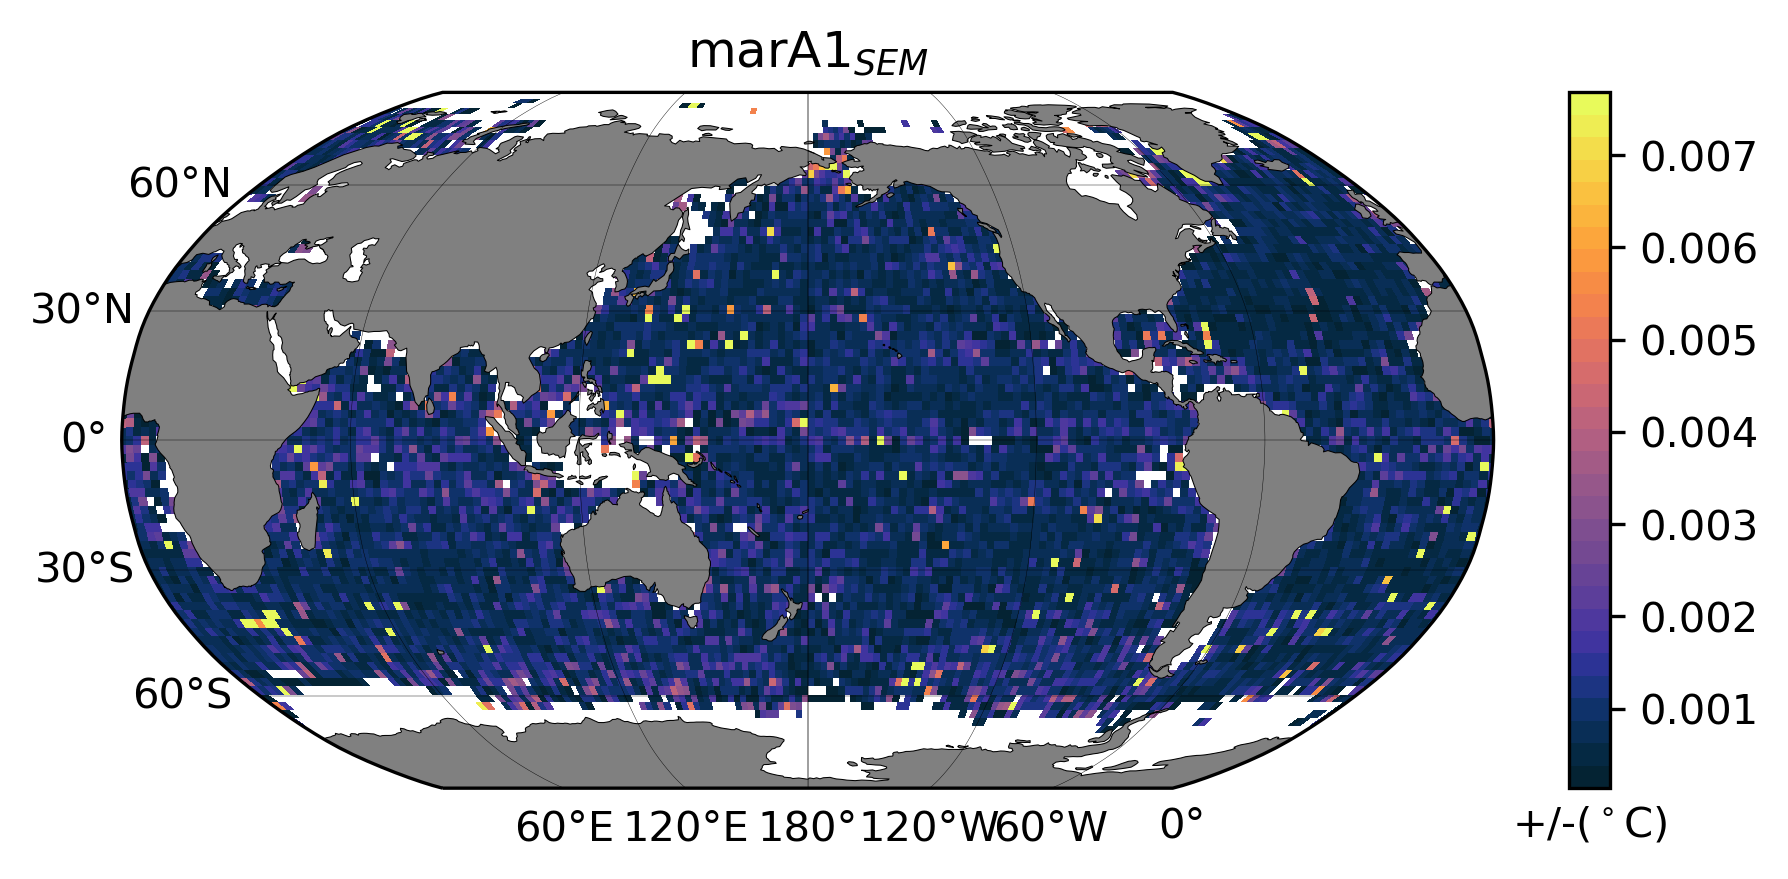

In [40]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(marSEM,[1,99])
cmap = plt.cm.get_cmap("cmo.thermal", 31)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    marSEM,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('marA1$_{SEM}$',);
cb.ax.set_xlabel("+/-($^\circ$C)")
plt.savefig("/Users/elifaigle/Desktop/Shane/marSEMA1.png")

/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_6036/2805680514.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("cmo.thermal", 31)


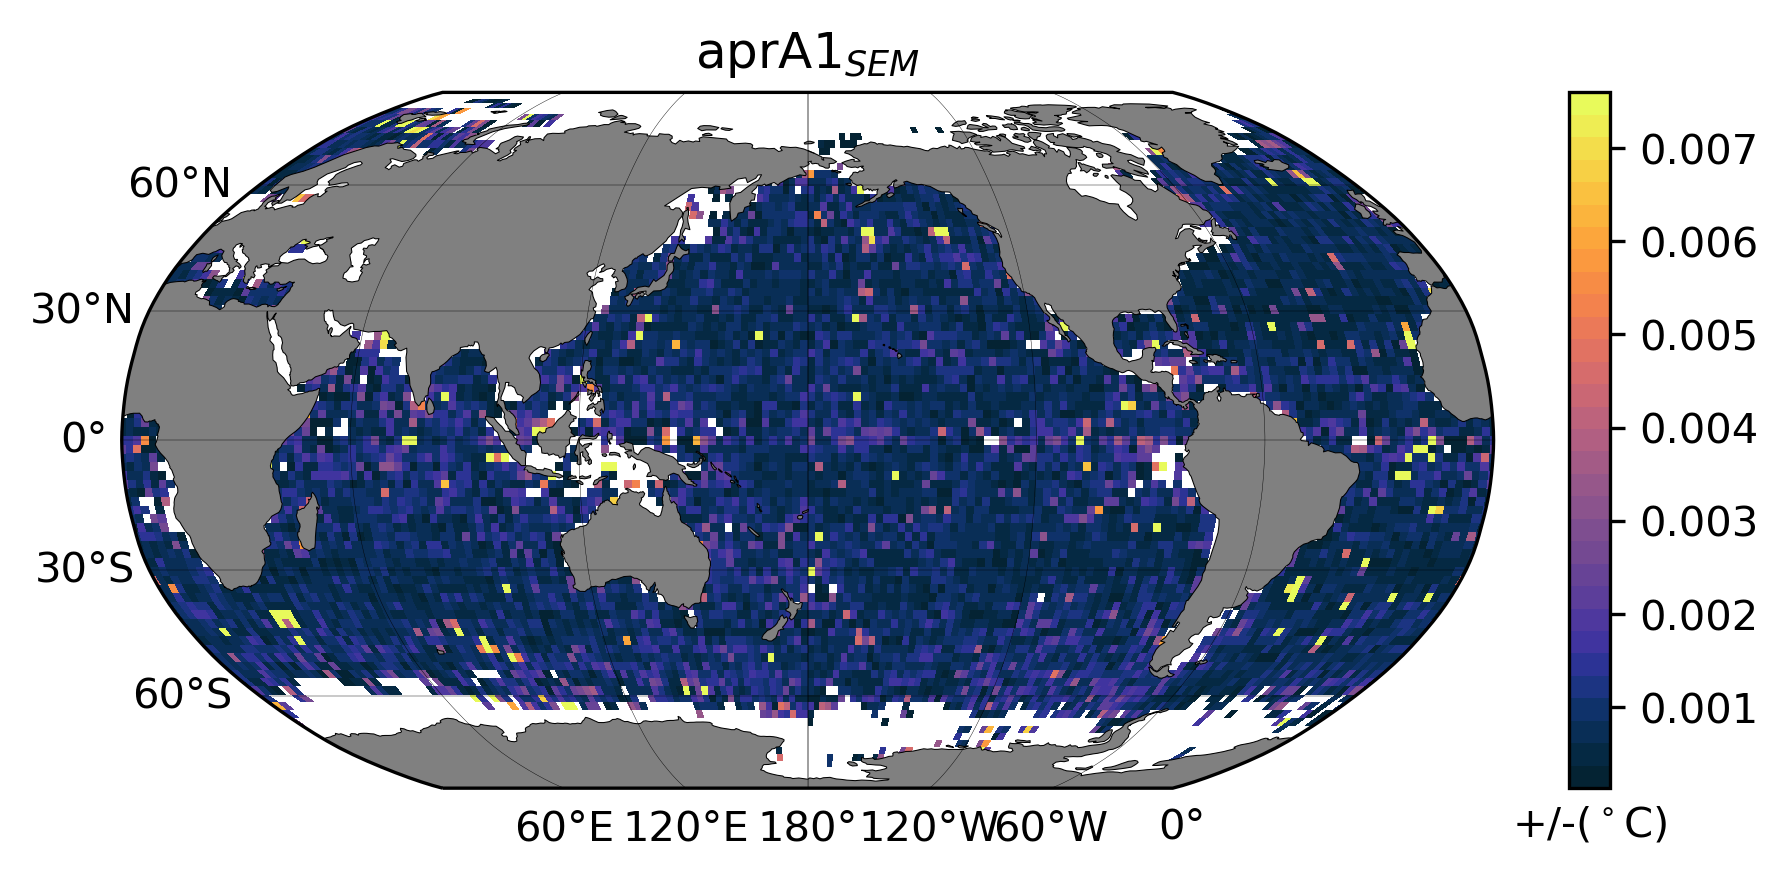

In [41]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(aprSEM,[1,99])
cmap = plt.cm.get_cmap("cmo.thermal", 31)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    aprSEM,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('aprA1$_{SEM}$',);
cb.ax.set_xlabel("+/-($^\circ$C)")
plt.savefig("/Users/elifaigle/Desktop/Shane/aprSEMA1.png")

/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_6036/4208129550.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("cmo.thermal", 31)


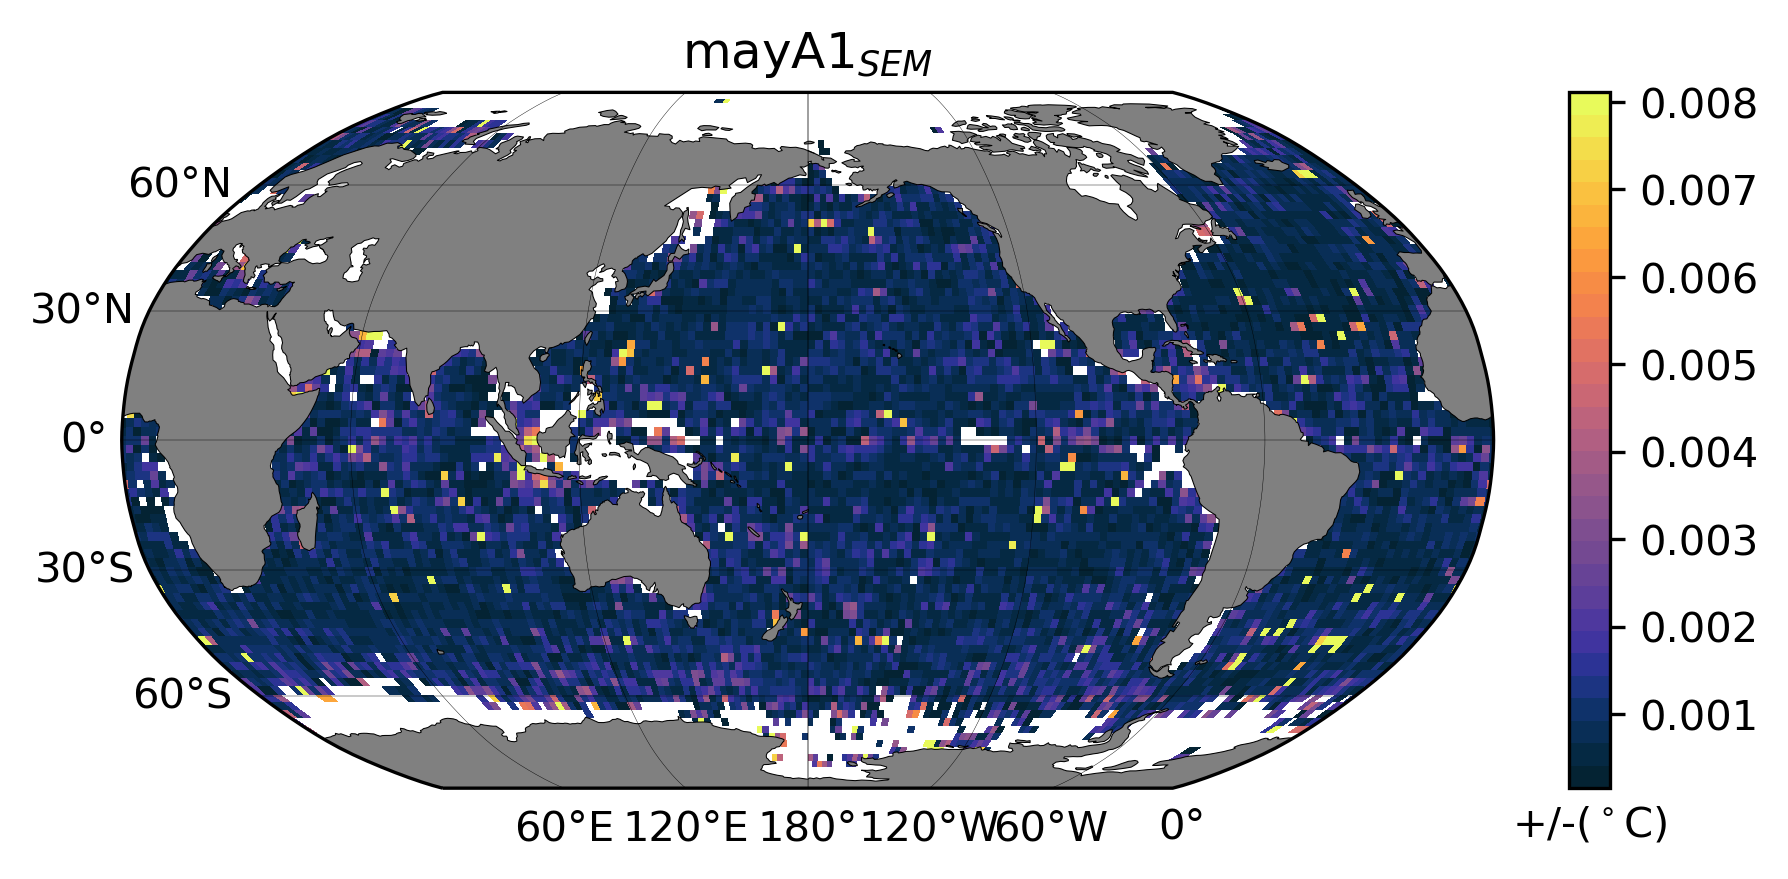

In [42]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(maySEM,[1,99])
cmap = plt.cm.get_cmap("cmo.thermal", 31)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    maySEM,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('mayA1$_{SEM}$',);
cb.ax.set_xlabel("+/-($^\circ$C)")
plt.savefig("/Users/elifaigle/Desktop/Shane/maySEMA1.png")

/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_6036/2459186862.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("cmo.thermal", 31)


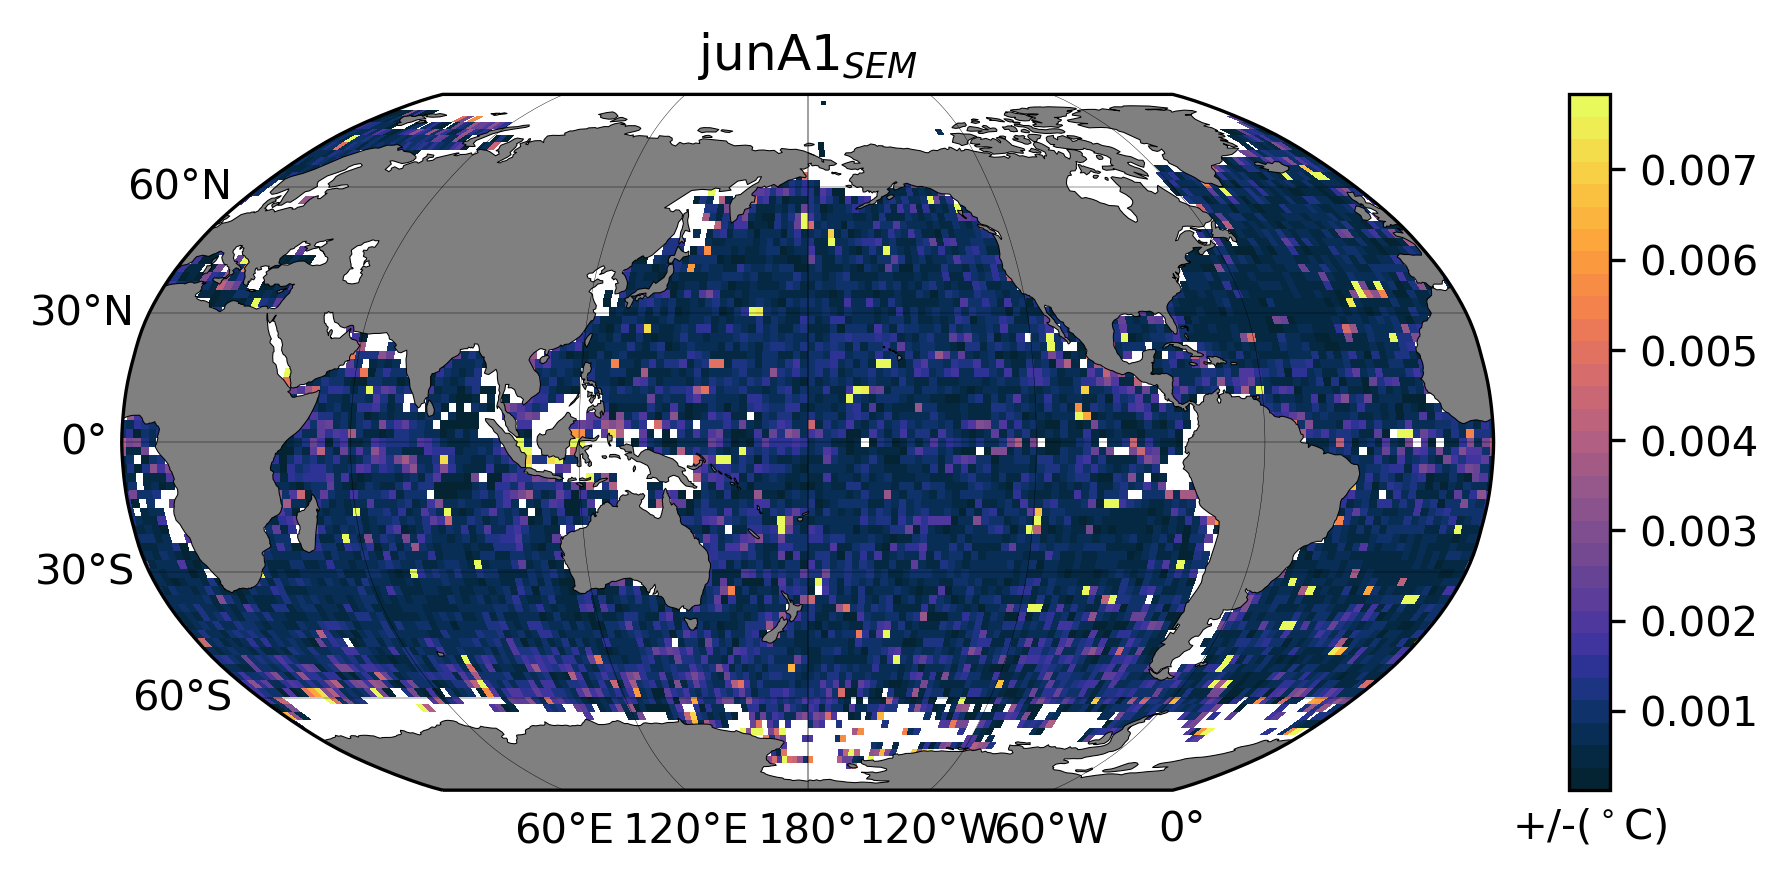

In [43]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(junSEM,[1,99])
cmap = plt.cm.get_cmap("cmo.thermal", 31)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    junSEM,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('junA1$_{SEM}$',);
cb.ax.set_xlabel("+/-($^\circ$C)")
plt.savefig("/Users/elifaigle/Desktop/Shane/junSEMA1.png")

/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_6036/673720931.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("cmo.thermal", 31)


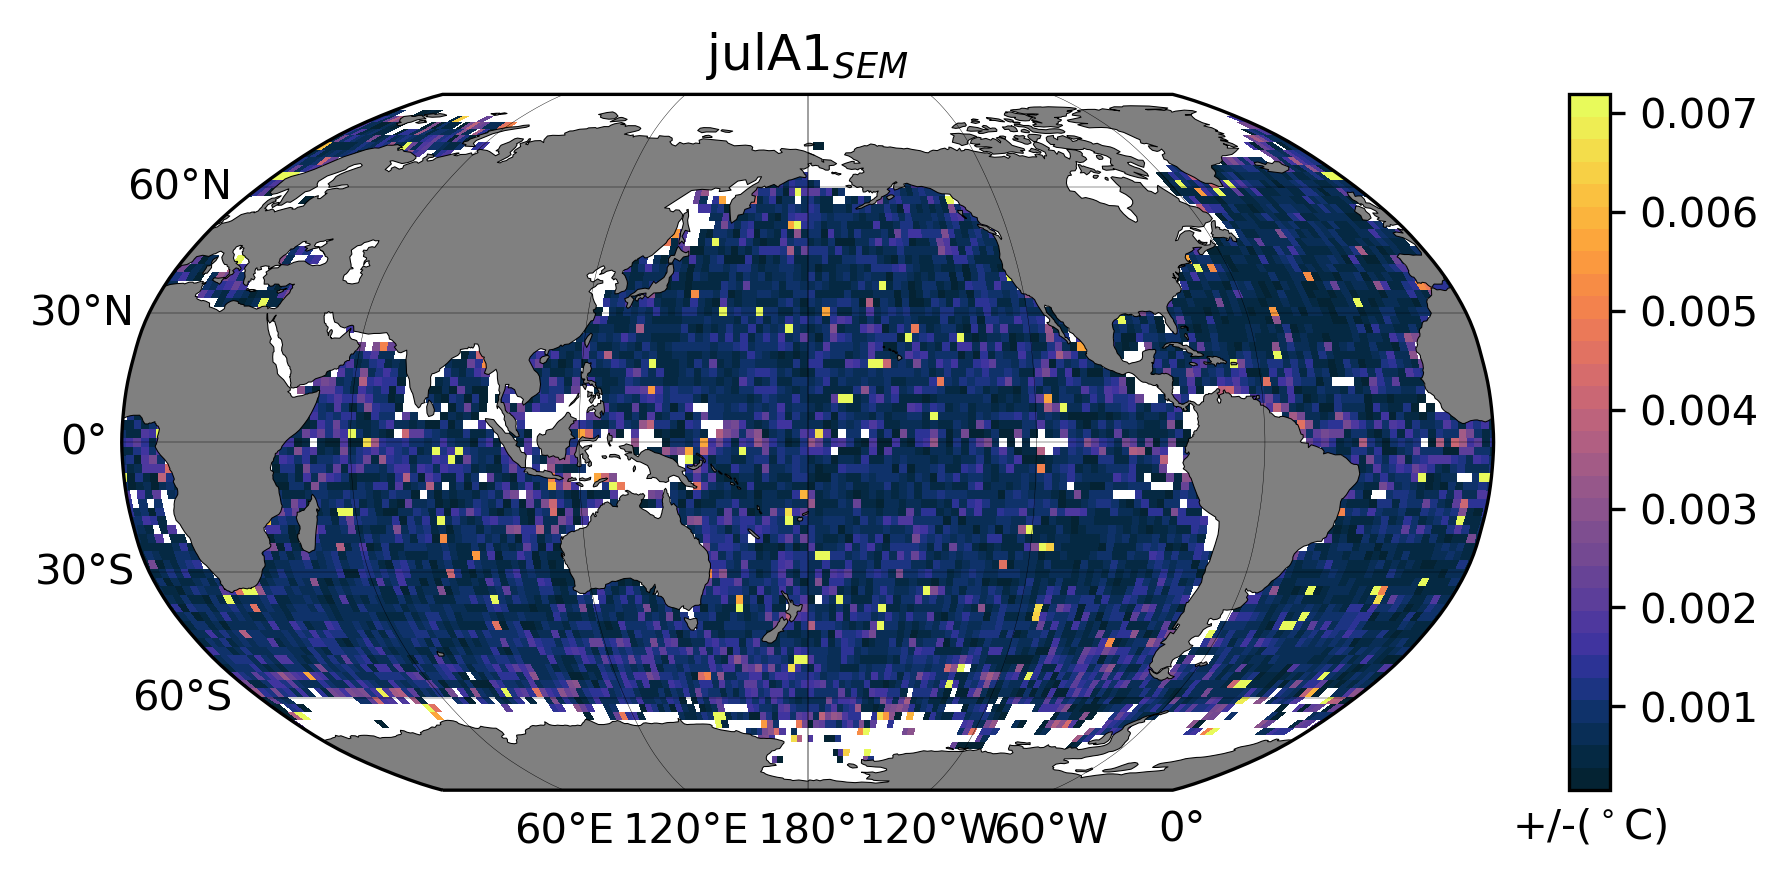

In [44]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(julSEM,[1,99])
cmap = plt.cm.get_cmap("cmo.thermal", 31)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    julSEM,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('julA1$_{SEM}$',);
cb.ax.set_xlabel("+/-($^\circ$C)")
plt.savefig("/Users/elifaigle/Desktop/Shane/julSEMA1.png")

/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_6036/2108076467.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("cmo.thermal", 31)


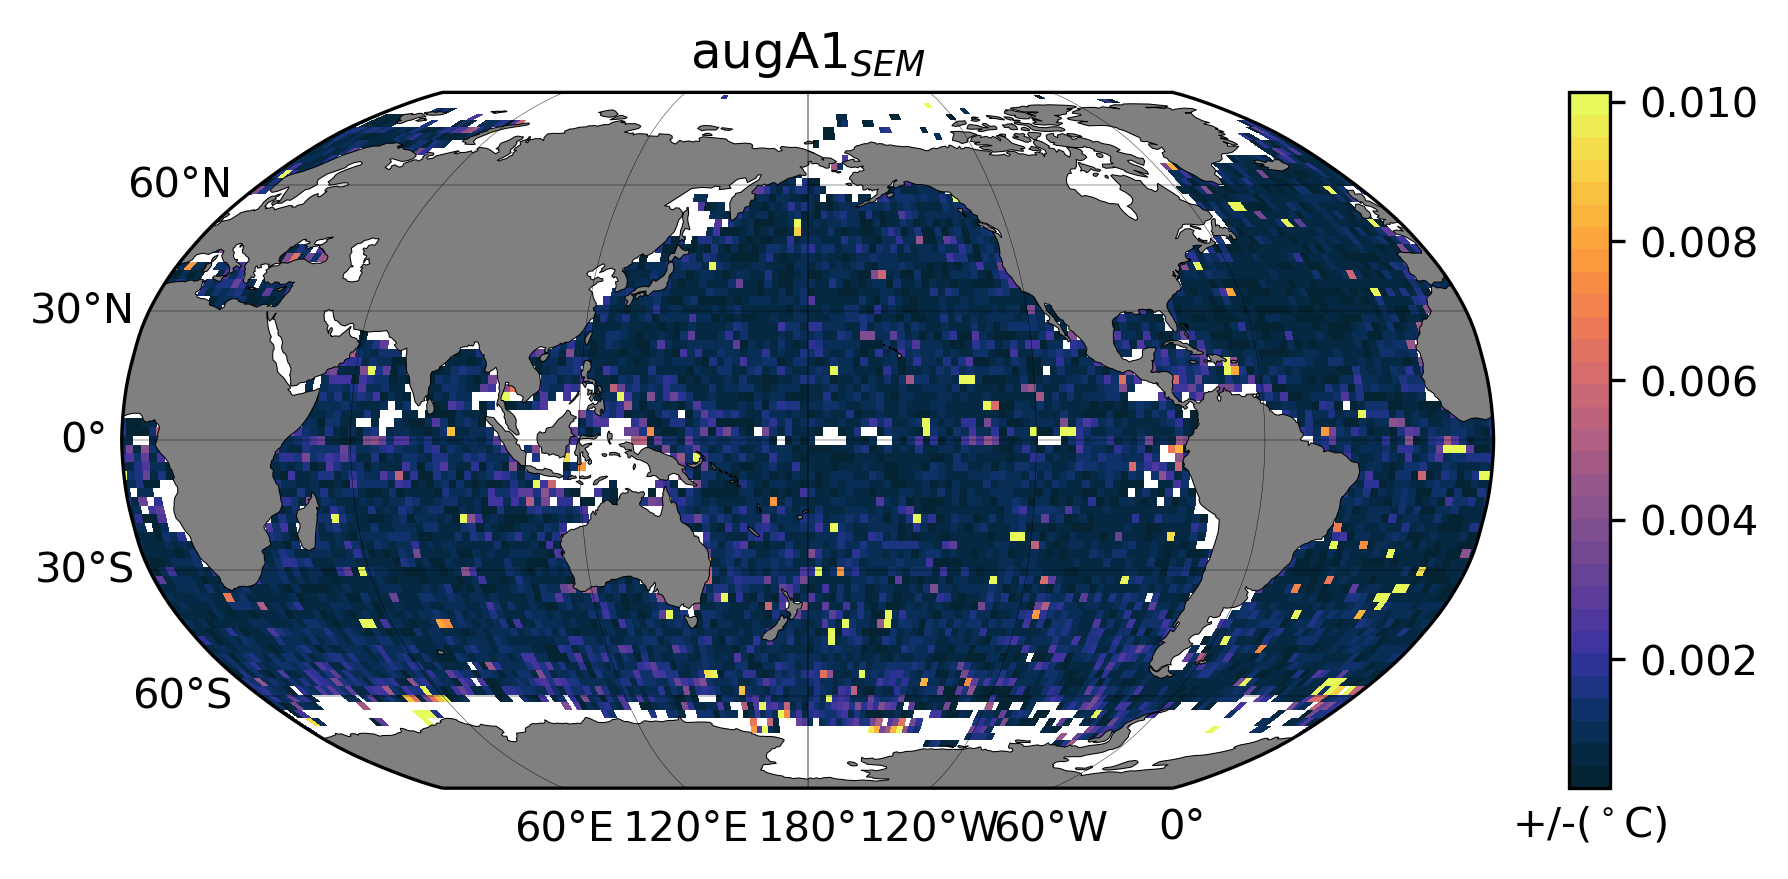

In [45]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(augSEM,[1,99])
cmap = plt.cm.get_cmap("cmo.thermal", 31)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    augSEM,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('augA1$_{SEM}$',);
cb.ax.set_xlabel("+/-($^\circ$C)")
plt.savefig("/Users/elifaigle/Desktop/Shane/augSEMA1.png")

/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_6036/2291595120.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("cmo.thermal", 31)


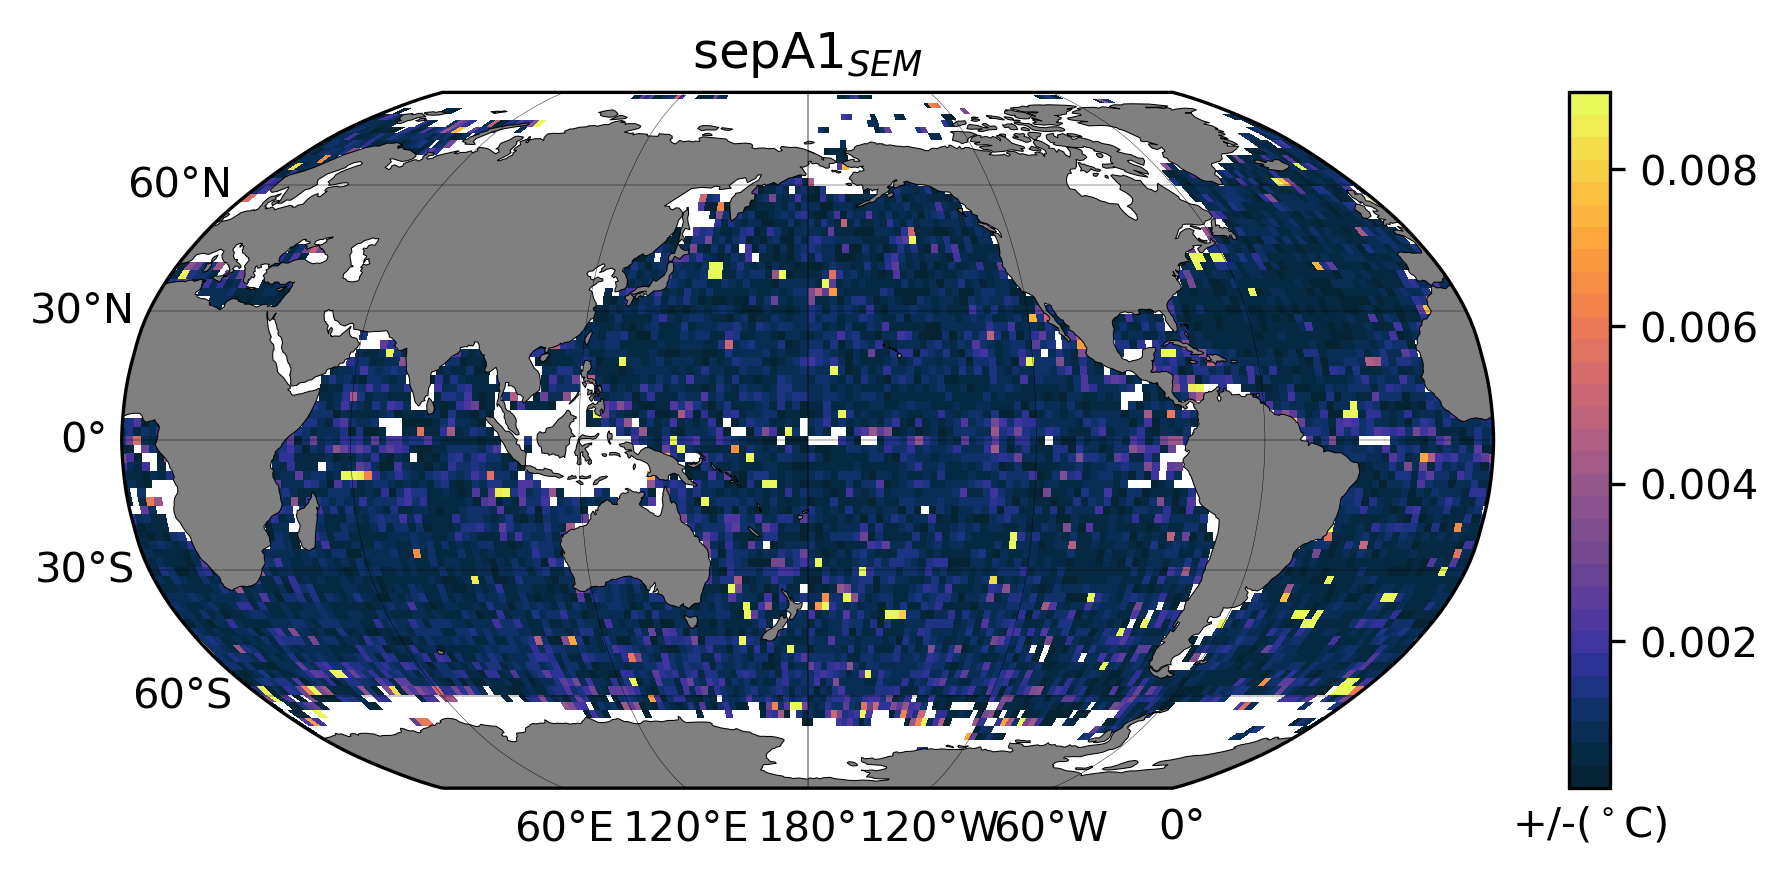

In [46]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(sepSEM,[1,99])
cmap = plt.cm.get_cmap("cmo.thermal", 31)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    sepSEM,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('sepA1$_{SEM}$',);
cb.ax.set_xlabel("+/-($^\circ$C)")
plt.savefig("/Users/elifaigle/Desktop/Shane/sepSEMA1.png")

/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_6036/428744044.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("cmo.thermal", 31)


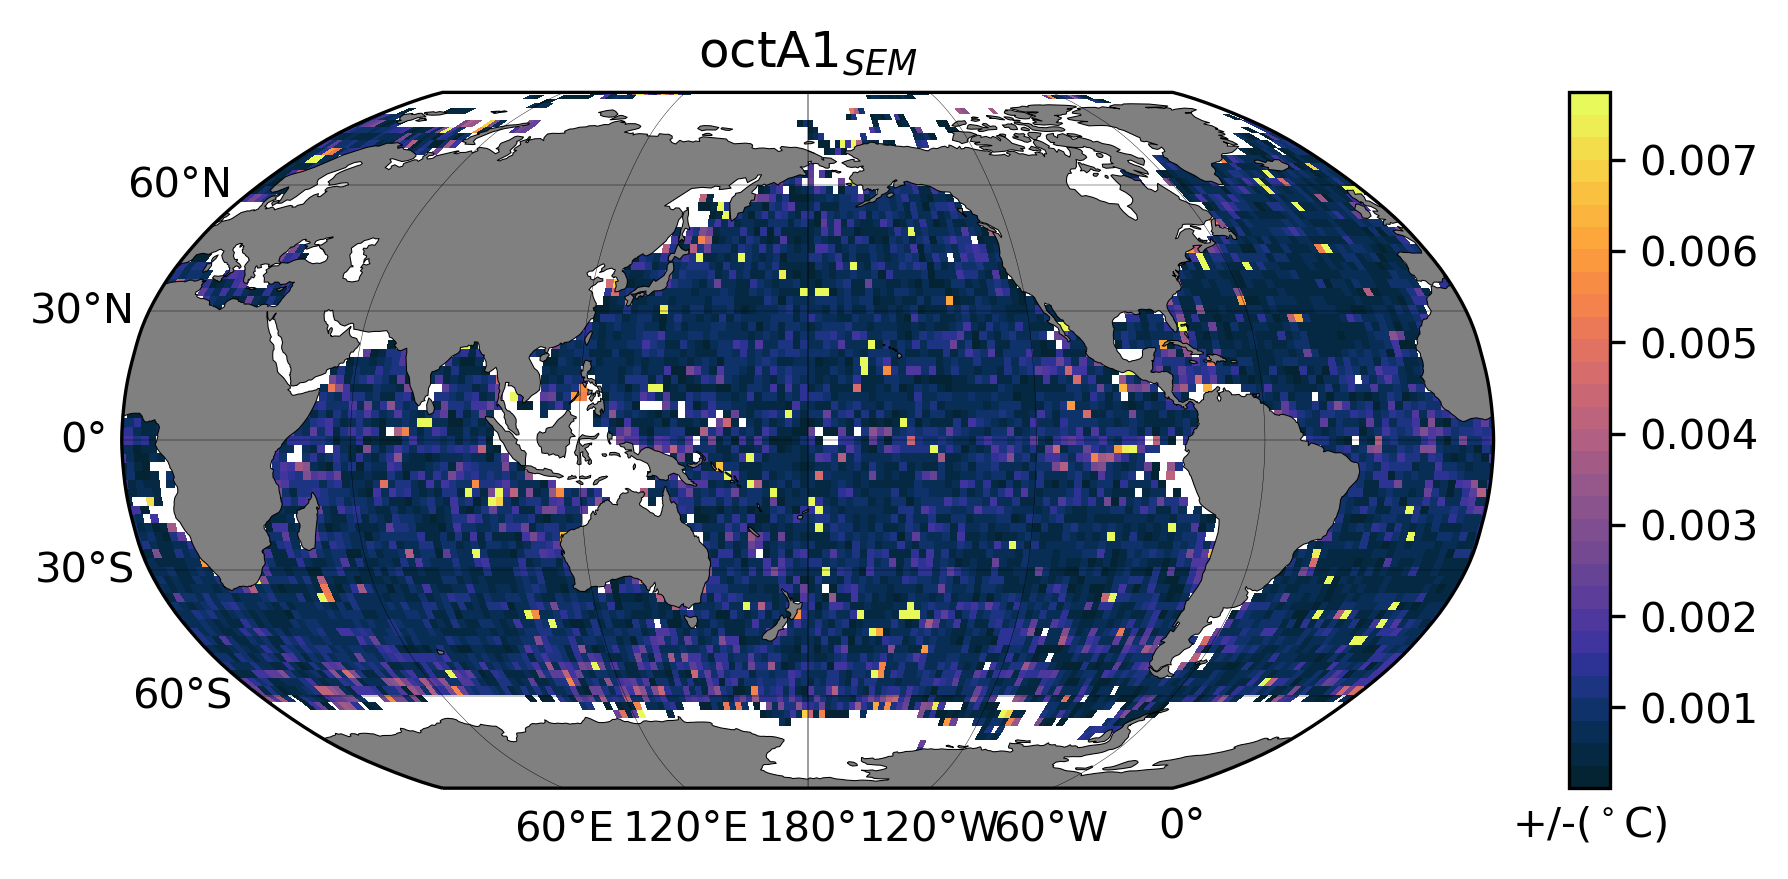

In [47]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(octSEM,[1,99])
cmap = plt.cm.get_cmap("cmo.thermal", 31)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    octSEM,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('octA1$_{SEM}$',);
cb.ax.set_xlabel("+/-($^\circ$C)")
plt.savefig("/Users/elifaigle/Desktop/Shane/octSEMA1.png")

/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_6036/3311218150.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("cmo.thermal", 31)


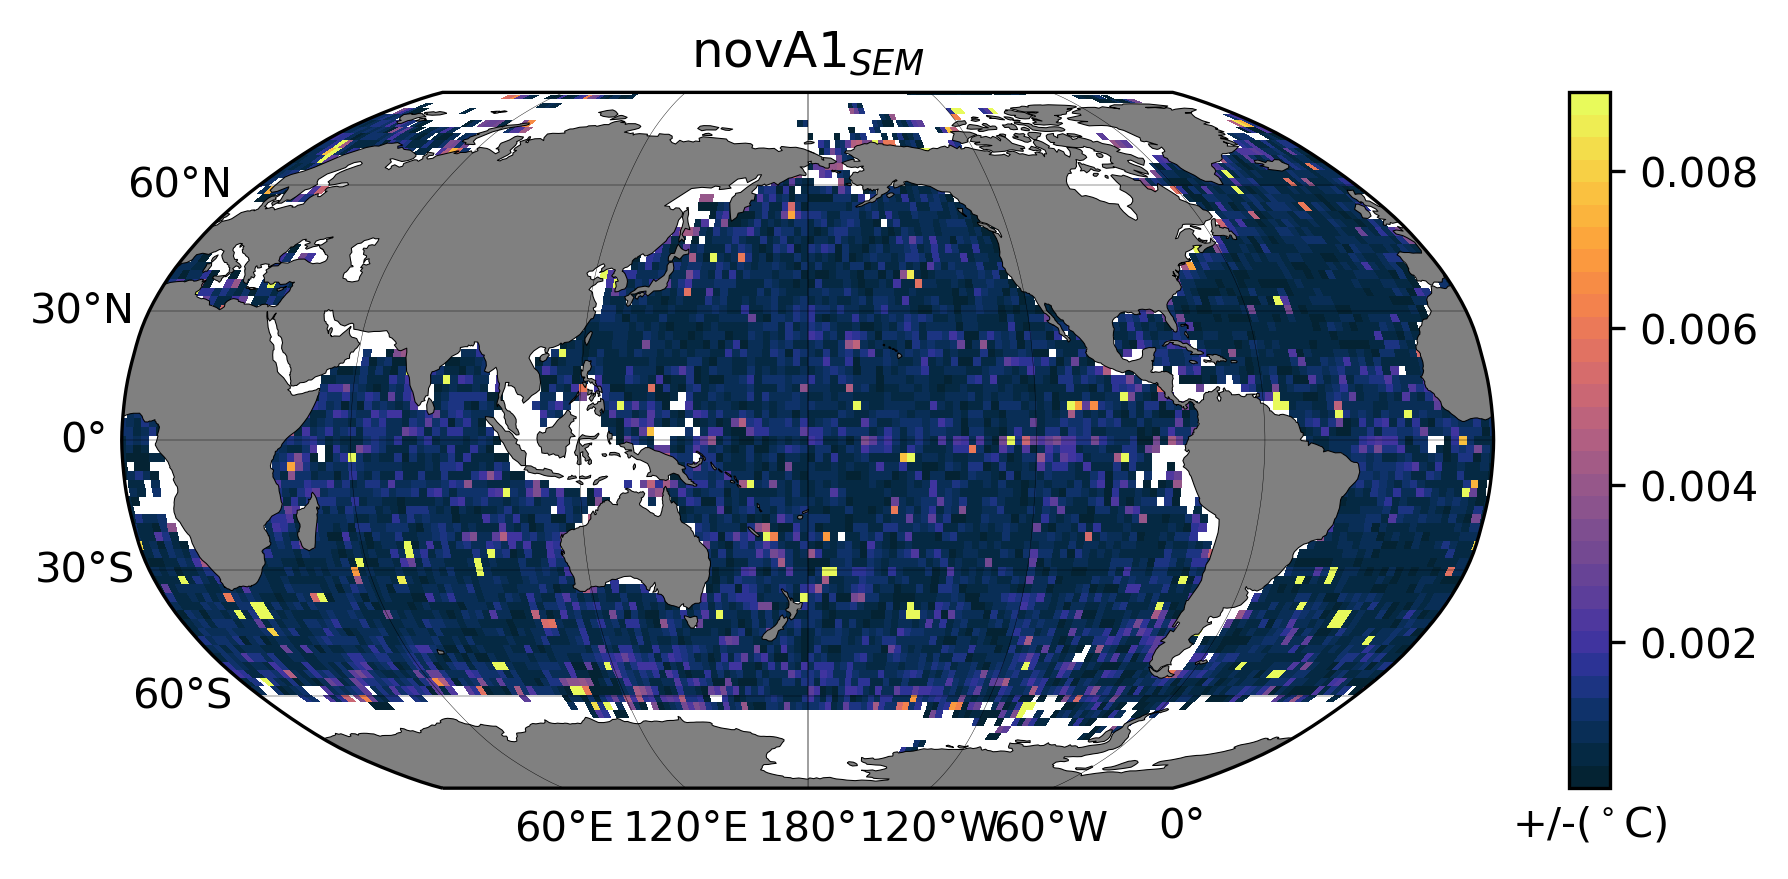

In [48]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(novSEM,[1,99])
cmap = plt.cm.get_cmap("cmo.thermal", 31)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    novSEM,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('novA1$_{SEM}$',);
cb.ax.set_xlabel("+/-($^\circ$C)")
plt.savefig("/Users/elifaigle/Desktop/Shane/novSEMA1.png")

/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_6036/646319688.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("cmo.thermal", 31)


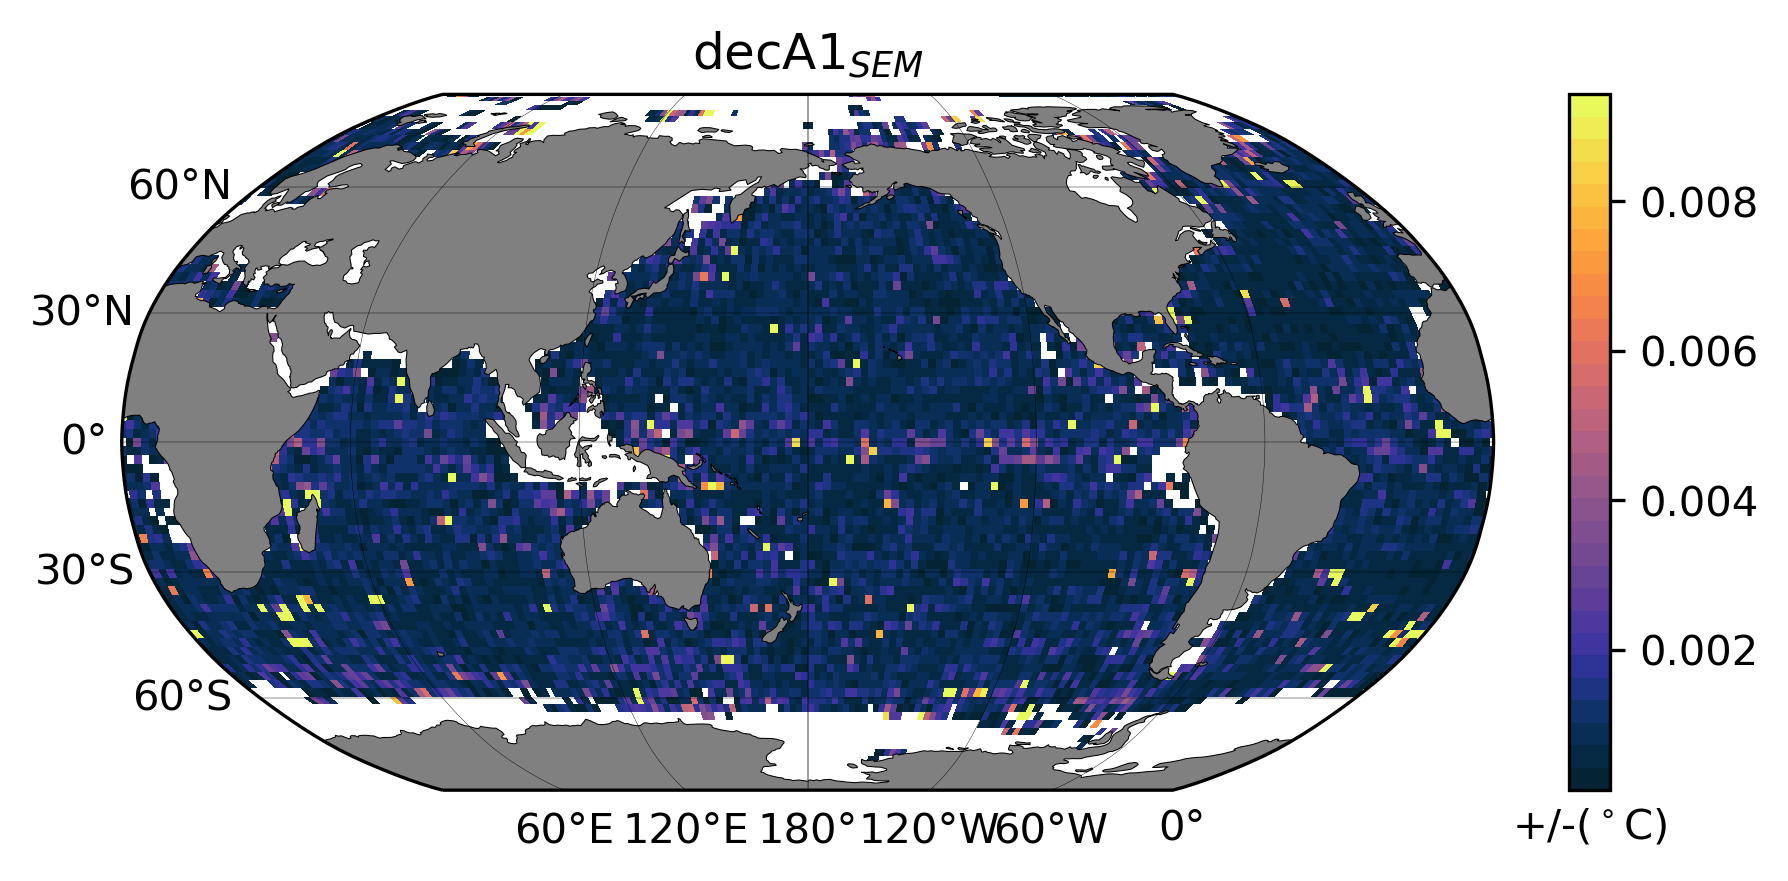

In [49]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(decSEM,[1,99])
cmap = plt.cm.get_cmap("cmo.thermal", 31)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    decSEM,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('decA1$_{SEM}$',);
cb.ax.set_xlabel("+/-($^\circ$C)")
plt.savefig("/Users/elifaigle/Desktop/Shane/decSEMA1.png")